In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../data/origin/train.csv')
dev = pd.read_csv('../data/origin/dev.csv')
test = pd.read_csv('../data/origin/test.csv')

In [3]:
df = pd.concat([train, dev, test], ignore_index=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7000 non-null   object
 1   prompt    7000 non-null   object
 2   response  7000 non-null   object
 3   label     7000 non-null   object
 4   context   6994 non-null   object
dtypes: object(5)
memory usage: 273.6+ KB


## 1. Distribuition

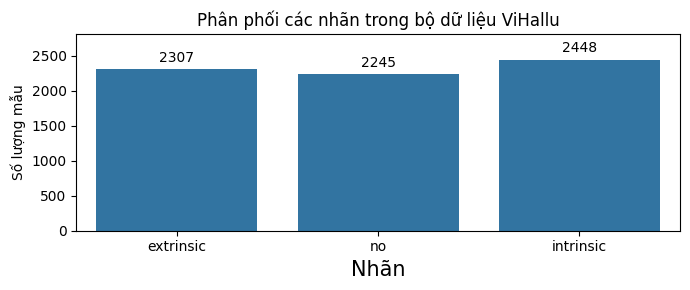

In [35]:
plt.figure(figsize=(7,3))

ax = sns.countplot(x='label', data=df)

ax.bar_label(ax.containers[0], padding=3, fontsize=10)
plt.ylim(0, df['label'].value_counts().max() * 1.15)

plt.title('Phân phối các nhãn trong bộ dữ liệu ViHallu')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu')
plt.tight_layout()
plt.savefig('../img/label_counts.png')
plt.show()

In [18]:
def count_words(text):
    return len(text.split())

In [22]:
word_counts = {
    'context': df['context'].astype(str).apply(count_words),
    'prompt': df['prompt'].astype(str).apply(count_words),
    'response': df['response'].astype(str).apply(count_words)
}

In [25]:
data_for_plot = []
for label, values in word_counts.items():
    temp_df = pd.DataFrame({'Word Count': values, 'Type': label})
    data_for_plot.append(temp_df)

df_plot = pd.concat(data_for_plot)

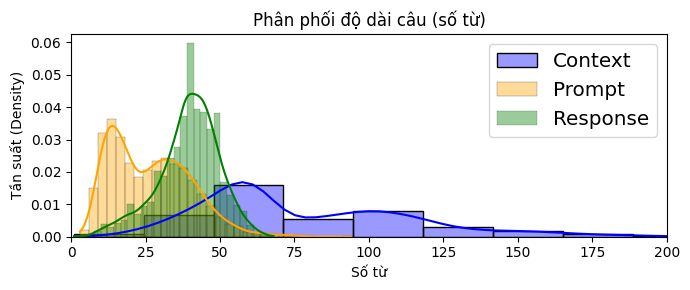

In [36]:
plt.figure(figsize=(7, 3))

sns.histplot(word_counts['context'], color='blue', label='Context', kde=True, stat='density', bins=30, alpha=0.4)
sns.histplot(word_counts['prompt'], color='orange', label='Prompt', kde=True, stat='density', bins=30, alpha=0.4)
sns.histplot(word_counts['response'], color='green', label='Response', kde=True, stat='density', bins=30, alpha=0.4)
plt.xlim(0, 200)

plt.legend(fontsize='x-large')
plt.title('Phân phối độ dài câu (số từ)')
plt.xlabel('Số từ')
plt.ylabel('Tần suất (Density)')
plt.tight_layout()
plt.savefig('../img/word_counts.png')